<a href="https://colab.research.google.com/github/Sherif-toiema22/NTI-machine-learning-tasks-/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving email_classification.csv to email_classification.csv


In [5]:
df = pd.read_csv("email_classification.csv")

In [6]:
import pandas as pd
df

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham
...,...,...
174,We're pleased to inform you that your refund h...,ham
175,Get rich quick! Invest in our revolutionary ne...,spam
176,Your free trial period is ending soon. Upgrade...,ham
177,Your order is on its way! Track your shipment ...,ham


In [7]:
# checking missing values
df.isnull().sum()

email    0
label    0
dtype: int64

In [9]:
df.groupby('label').describe()

email                                                               
      count unique                                                top freq
label                                                                     
ham     100    100  Upgrade to our premium plan for exclusive acce...    1
spam     79     50  You've been selected for a free trial of our p...    4

In [10]:
df['spam']=df['label'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,email,label,spam
0,Upgrade to our premium plan for exclusive acce...,ham,0
1,Happy holidays from our team! Wishing you joy ...,ham,0
2,We're hiring! Check out our career opportuniti...,ham,0
3,Your Amazon account has been locked. Click her...,spam,1
4,Your opinion matters! Take our survey and help...,ham,0


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.email,df.spam)
import os
import warnings
import numpy as np
import pandas as pd

#--------------------------------------------------------------------------------------#

import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#--------------------------------------------------------------------------------------#

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

#--------------------------------------------------------------------------------------#

from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

#--------------------------------------------------------------------------------------#

warnings.filterwarnings("ignore")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        data_path = os.path.join(dirname, filename)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


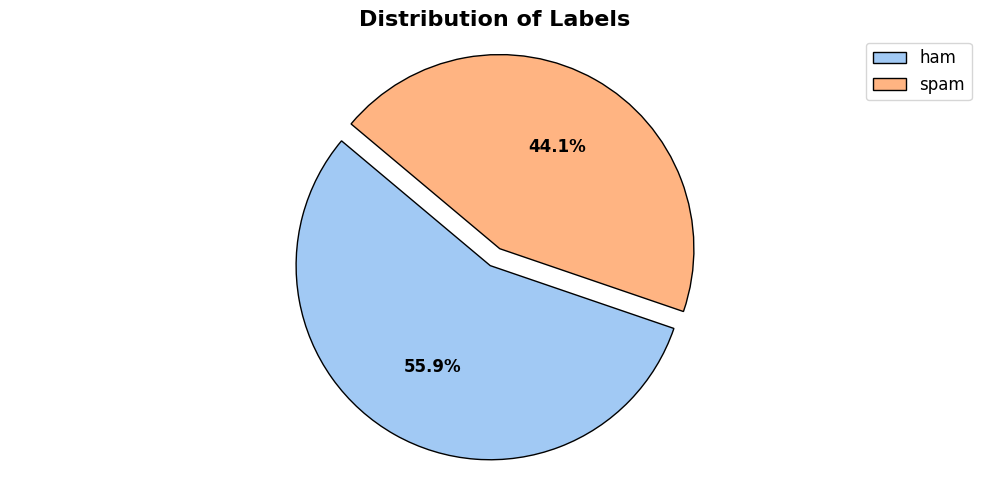

In [31]:
fig, ax = plt.subplots(figsize=(10, 5))

labels = df['label'].value_counts().index
sizes = df['label'].value_counts().values
colors = sns.color_palette('pastel')
# wedges
wedges, texts, autotexts = ax.pie(sizes, colors = colors,
                                  autopct = '%1.1f%%', startangle = 140,
                                  explode = (0.1, 0), wedgeprops = dict(edgecolor = 'black'))

ax.set_title('Distribution of Labels', fontsize = 16, fontweight = 'bold')
ax.axis('equal')
ax.legend(wedges, labels, loc = "best", fontsize = 12)

for text in texts:
    text.set_fontsize(12)
    text.set_fontweight('bold')

for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_fontweight('bold')

plt.tight_layout()
plt.show()

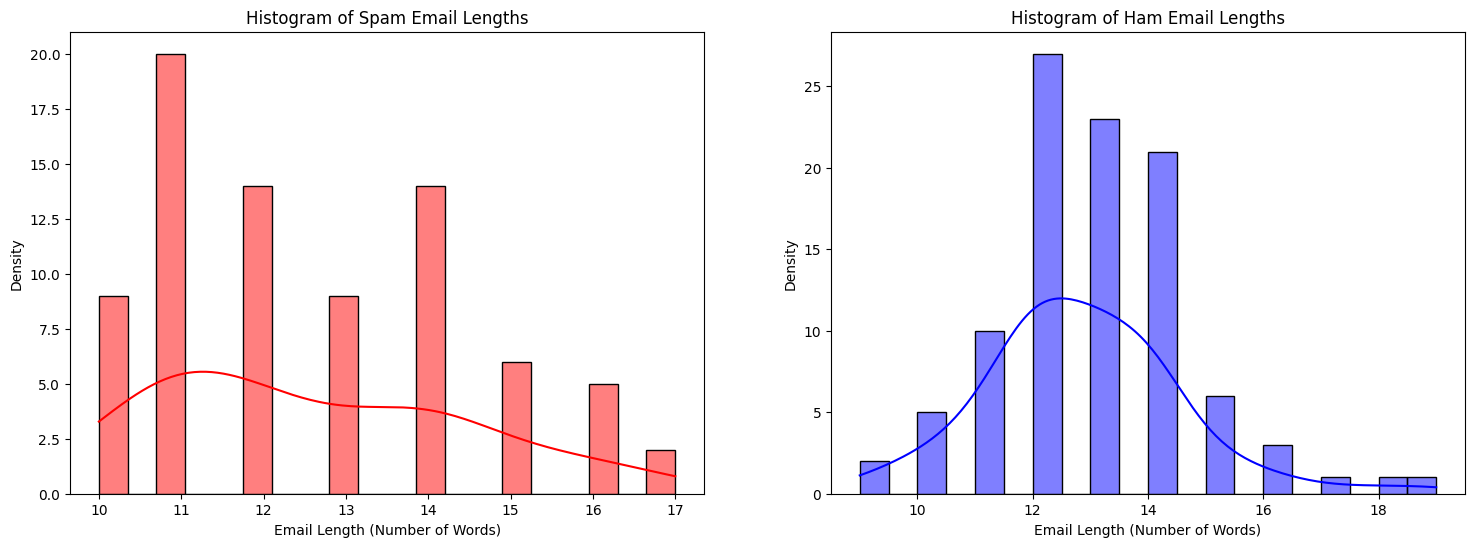

In [33]:
spam_lengths = [len(email.split()) for email in df[df['label'] == 'spam']['email']]
ham_lengths = [len(email.split()) for email in df[df['label'] == 'ham']['email']]

fig, axes = plt.subplots(1, 2, figsize = (18, 6))

# spam emails

sns.histplot(spam_lengths, bins = 20, color = 'red', kde = True, ax = axes[0])
axes[0].set_title('Histogram of Spam Email Lengths')
axes[0].set_xlabel('Email Length (Number of Words)')
axes[0].set_ylabel('Density')

# ham emails

sns.histplot(ham_lengths, bins = 20, color = 'blue', kde = True, ax = axes[1])
axes[1].set_title('Histogram of Ham Email Lengths')
axes[1].set_xlabel('Email Length (Number of Words)')
axes[1].set_ylabel('Density')

plt.show()

In [44]:
import pandas as pd

# Load the dataset
# data = pd.read_csv('spam.csv', encoding='latin-1')



KeyError: "None of [Index(['v1', 'v2'], dtype='object')] are in the [columns]"

In [46]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define a function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'\W', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply the preprocessing function to the text column
df['email'] = df['email'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
from sklearn.model_selection import train_test_split

# Define labels
y = df['label'].map({'ham': 0, 'spam': 1})

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)


In [51]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the model
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.95      0.98        22

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36

Confusion Matrix:
[[14  0]
 [ 1 21]]
